# Les variables

La déscription des variables que nous allons utiliser

* gender : sexe du client {"Male", "Female"}
* SeniorCitizen : 1 si le client est Senior 0 sinon
* Partner : 1 si le client a un partenaire 0 sinon
* Dependents : 1 si le client a des personnes à charge 0 sinon
* tenure : # de mois pendant lesquels le client est resté avec la compagnie
* PhoneService : 1 si le client dispose d'un service téléphonique 0 sinon
* MultipleLines : 1 si le client dispose de multipe ligne 0 sinon
* InternetService : service Internet {DSL, Fiber} 0 sinon
* OnlineSecurity : 1 si le client dispose d'une sécurité en ligne 0 sinon
* OnlineBackup : 1 si le client dispose d'une sauvegarde en ligne 0 sinon
* DeviceProtection :1 si le client dispose d'une protection d'appareil 0 sinon
* TechSupport : 1 si le client dispose d'un support technique 0 sinon
* StreamingTV : 1 si le client a la télévision en streaming 0 sinon
* StreamingMovies : 1 si le client les films en streaming 0 sinon
* Contract : type du contrat {Month-to-month, One year, two year}
* PaperlessBilling : 1 si le client a une facturation sans papier 0 sinon
* PaymentMethod : mode de payment {Electronic check, Mailed check, Bank transfer, Credit card}
* MonthlyCharges : montant mensuel 
* TotalCharges : le total des charges
* Churn : 1 si le client a quitté la compagnie le dernier mois 0 sinon

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV


# Pré-Traitement des données

Dans cette partie nous allons effectuer:

    1 - Retrait des observations avec valeur manquante
    
    2 - Pour chaque colonne binaire, encoder les « Yes » par 1 et l’autre valeur (« No » et « No interne
    service »)par 0
    
    3 - Pour toute variable, nous allons creer une variable binaire pour chaque categories
    

In [80]:
# importation des données
jeu = pd.read_csv("data.csv")
jeu_temp = jeu

# Suppression de la colomne "customerID"
jeu.drop("customerID", inplace=True, axis =1)

# remplacer "No internet service" par "No"
jeu = jeu.replace("No internet service", "No")

# remplacer "No phone service" par "No"
jeu["MultipleLines"] =jeu["MultipleLines"].replace("No phone service", "No")

# remplacer les "Yes, No" par "0 et 1"
jeu = jeu.replace(["No", "Yes"], [0,1])

# remplacer "Male Female" par "0 et 1"
jeu = jeu.replace(["Male", "Female"], [0,1])

In [81]:
# Transformer la variable "TotalCharges" en une variable numérique
jeu["TotalCharges"]=jeu["TotalCharges"].replace(r'^\s*$', np.nan, regex=True)
jeu["TotalCharges"]=pd.to_numeric(jeu["TotalCharges"])

In [82]:
# Transoformation de la variable InternetService en variable binaire
Fiber_optic =  (jeu['InternetService'] ==  "Fiber optic")*1  
DSL =  (jeu['InternetService'] ==  "DSL")*1         
No_internet = (jeu['InternetService'] ==  0)*1 

jeu['Fiber_optic'] = Fiber_optic
jeu['DSL'] = DSL
jeu['No_internet'] = No_internet

# Transoformation de la variable Contract en variable binaire
Month_to_month =(jeu['Contract'] ==  "Month-to-month")*1   
Two_year = (jeu['Contract'] ==  "Two year")*1  
One_year = (jeu['Contract'] ==  "One year")*1  

jeu['Month_to_month'] = Month_to_month
jeu['Two_year'] = Two_year
jeu['One_year'] = One_year

# Transoformation de la variable PaymentMethod en variable binaire
Electronic_check = (jeu['PaymentMethod'] ==  "Electronic check")*1         
Mailed_check  =  (jeu['PaymentMethod'] ==  "Mailed check")*1            
Bank_transfer =  (jeu['PaymentMethod'] ==  "Bank transfer (automatic)")*1
Credit_card = (jeu['PaymentMethod'] ==  "Credit card (automatic)")*1   

jeu['Electronic_check'] = Electronic_check
jeu['Mailed_check'] = Mailed_check
jeu['Bank_transfer'] = Bank_transfer
jeu['Credit_card'] = Credit_card


In [83]:
# Enleve les variables : InternetService, Contract et PaymentMethod
jeu = jeu.drop(['InternetService', 'Contract', 'PaymentMethod'], axis=1)

# elever les valeurs manquantes
jeu.dropna(inplace = True)
jeu.head()
jeu.shape

(7032, 27)

# Quelques statistiques

Dans cette partie, nous allons les statistique de quelques variables

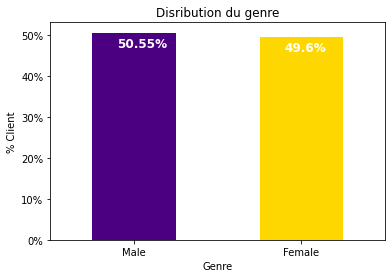

In [84]:
# Nombre de femmes et d'hommes
x = (jeu_temp["gender"].value_counts()*100/len(jeu)).plot(kind = 'bar', 
                                                     color = ['indigo', 'gold'], rot=0)
x.yaxis.set_major_formatter(mtick.PercentFormatter())
x.set_ylabel('% Client')
x.set_xlabel('Genre')
x.set_title('Disribution du genre')

for i in x.patches:
    x.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()), 2))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')


D'après le graphique, nous avons le même nombre de client homme et femme

<AxesSubplot:xlabel='gender', ylabel='MonthlyCharges'>

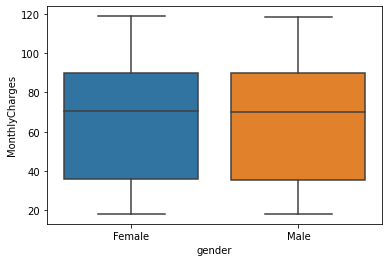

In [85]:
# Facture selon le sexe 
sbn.boxplot(x = jeu_temp.gender, y = jeu.MonthlyCharges)

Les hommes et le femmes semblent payer le même montant par mois.

(7032, 27)

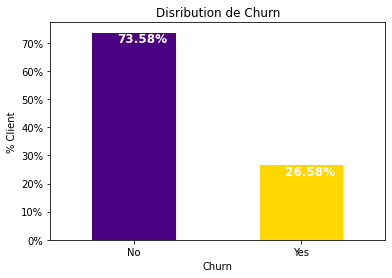

In [86]:
# Nombre de client qui ont annulé leur abonement 
x = (jeu_temp["Churn"].value_counts()*100/len(jeu)).plot(kind = 'bar', 
                                                     color = ['indigo', 'gold'], rot=0)
x.yaxis.set_major_formatter(mtick.PercentFormatter())
x.set_ylabel('% Client')
x.set_xlabel('Churn')
x.set_title('Disribution de Churn')

for i in x.patches:
    x.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()), 2))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')
    
jeu_temp = jeu

jeu.shape

On remarque qu'il y a un des débalancement au niveau des clients qui restentent avec la compagnie *73.46%* et  qui ont décidé de la quitter *26.54%*. 

Nous allons utiliser la méthode de balancement de donnees pour équilibrer nos notre variable d'intérêt `Churn` afin de bien détecter les clients qui ont annule leut abonement.

Nous allons generer des observations synthétiques à l’aide de l’algorithme SMOTE, qui est un des plus connus dans la littérature et en pratique car simple mais potentiellement très efficace

Tout d'abord, nous allons isoler `40%` pour le jeu de validation et de l'entrainement, ensuite pour les `60%` des donnees qui restent, nous allons appliquer la methode `Smote` et nous allons l'utiliser comme jeu d'entrainement. 

Nous n’appliquons pas le SMOTE sur les données de validation et de test car elles doivent être représentatives de la réalité.

In [87]:
# Donnee original
X_ = jeu.drop(['Churn'], axis=1)
y_ = jeu["Churn"]
X, X_autre, y, y_autre = train_test_split(X_, y_, test_size=0.3, random_state=1234)
X_validation, X_test, y_validation, y_test = train_test_split(X_autre, y_autre, test_size=0.5, random_state=1234)

jeu = X.join(y)
jeu.shape

# Smote
from imblearn.over_sampling import SMOTE 
surEchn = SMOTE(random_state=1234)
X_train, y_train = surEchn.fit_resample(jeu.loc[:, jeu.columns!='Churn'], jeu.Churn)

jeu_eq= X_train.join(y_train)

(7206, 26)

1    3603
0    3603
Name: Churn, dtype: int64

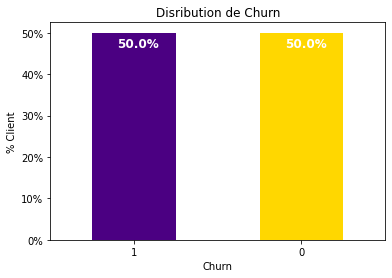

In [88]:
# Nombre de client qui ont annulé leur abonement 
x = (jeu_eq["Churn"].value_counts()*100/len(jeu_eq)).plot(kind = 'bar', 
                                                     color = ['indigo', 'gold'], rot=0)
x.yaxis.set_major_formatter(mtick.PercentFormatter())
x.set_ylabel('% Client')
x.set_xlabel('Churn')
x.set_title('Disribution de Churn')

for i in x.patches:
    x.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()), 2))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

jeu_eq.Churn.value_counts()

Nous obtenons maintenant jeu de données équilibrer avec **3603** de `0` et **3603** de `1` pour la variable reponse `churn` que nous avons separer en jeu d'enterainement est de validation

# Le modéle de base

Pour le modèle de base, nous allons concidairer que le variable d'intérêt `Churn` suit une loi `Bernoulli`.

$$
Y \sim Bernoulli(\theta)
\\
\mathbb{P}(Y=k|\theta) = \theta^k(1-\theta)^{1-k}
$$

Pour éstimer le paramètre $\theta$, nous allons utliser la méthode du logvraisemblance.

$$
L(\theta) = \prod_i\theta^{n_i}(1-\theta)^{1-n_i} 
\\
L(\theta) = \theta^{\sum_i n_i} (1-\theta)^{n-\sum_i n_i} 
\\
LL(\theta) = {\sum_i n_i}log(\theta) + {n-\sum_i n_i}log((1-\theta))
\\
\frac{\partial LL(\theta)}{\partial \theta} = 0
\\
\hat{\theta} = \frac{\sum_i n_i}{n}
$$

On sait que, aprés avoir blancer les données, nous avons **50%** de `0` et **50%** de `1`, donc $\hat{\theta} = 0.5$

# Les modèles

Nous allons essayer d'améliorer la force prédictive de nos modèles en optimisant leurs hyperparamètres, qui définissent comment le modèle apprend des données. Pour se faire, vu que nos données ne sont pas trop volumineuses, nous allons utiliser la méthode de recherche par grille, que nous allons implanter par 2 méthodes l'aide des fonctions créée à la main, puis à l'aide d'une fonction de sklearn qui utilise la validation croisée lors de la recherche pour les modeles suivants :

   * Naive bayes
    
   * Régression logistique
    
   * Gradient Boosting
    
   * Forêt aléatoire
   
   * Modèle de xgboost
    
   * Xgboost linéaire
    
   * Reseaux de neurones

La métrique regardée est le score `F1`, car nous supposons qu’il est plus important pour une compagnie de pouvoir prédire une défection qu’une non-défection afin de prendre des actions pour garder le client susceptible de faire défection.

## Classification SVM

Nous allons visualiser la classe de la variabe Churn en fonctione des varibales TotalCharges et MonthlyCharges

(Text(0.5, 0, 'TotalCharges'), Text(0, 0.5, 'MonthlyCharges'))

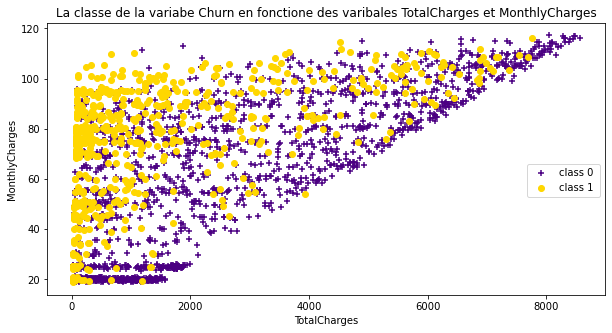

In [24]:
c0 = (y==0)
c1 = (y==1)

graph = plt.figure(figsize=(10,5))
graph = graph.add_subplot(1,1, 1)
graph.scatter(X.TotalCharges[c0], X.MonthlyCharges[c0], marker="+", c='indigo', label='class 0 ')
graph.scatter(X.TotalCharges[c1], X.MonthlyCharges[c1], marker="o", c = 'gold', label='class 1 ')
graph.legend(bbox_to_anchor=(1, 0.5))
graph.set_title("La classe de la variabe Churn en fonctione des varibales TotalCharges et MonthlyCharges")
graph.set_xlabel("TotalCharges"), graph.set_ylabel("MonthlyCharges")

Nous allons visualiser la classe de la variabe Churn en fonctione des varibales tenure et MonthlyCharges

(Text(0.5, 0, 'tenure'), Text(0, 0.5, 'MonthlyCharges'))

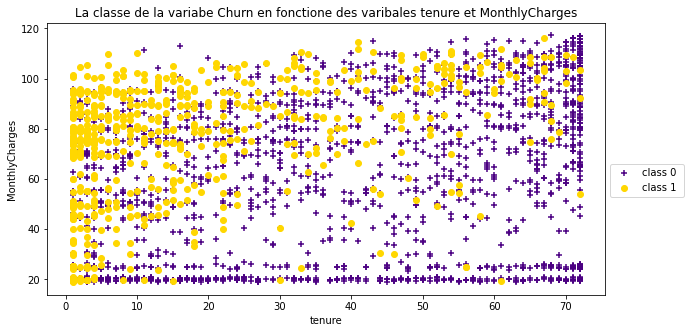

In [25]:
graph = plt.figure(figsize=(10,5))
graph = graph.add_subplot(1,1, 1)
graph.scatter(X.tenure[c0], X.MonthlyCharges[c0], marker="+", c='indigo', label='class 0 ')
graph.scatter(X.tenure[c1], X.MonthlyCharges[c1], marker="o", c = 'gold', label='class 1 ')
graph.legend(bbox_to_anchor=(1, 0.5))
graph.set_title("La classe de la variabe Churn en fonctione des varibales tenure et MonthlyCharges")
graph.set_xlabel("tenure"), graph.set_ylabel("MonthlyCharges")

Selon les deux graphique, on voit bien que les deux classes, `0` et `1`, ne sont pas linéarement séparables. Donc, un modéle de classification SVM ne serait pas approprier pour ce jeu de données.

## Modèle de Naive Bayes
 
Le modele est donnees par la fonction suivante. Notre but est trouver les parametres qui maximisent cette dernmiere.

$$
\mathbb{P}(Y=k|X) \propto \mathbb{P}(X|Y=k)  \ \mathbb{P}(Y=k)
$$

Dans notre fonction, nous allons trouver le parametres $\alpha$ optimum pour :

$$
\mathbb{P}(Y=k) = \pi_k = \frac{N_k + \alpha_k}{N + \sum_{k'} \alpha_{k'}}
$$

Ou : 

* $N_k$ : Nombre observation pour k = {0,1}

* N : Nombre d'obeservation total

Nous allons tester notre modele sur $\alpha$ = {0.5, 0.75, 1, 1.25, 1.5, 10}

In [692]:
#Modèle de Naive Bayes optimisé
# def bnb(alpha,metric,xtrain,ytrain,xtest,ytest):
#     best_model=0
#     best_error=0
#     m = []
#     for val in alpha :
#         model=MultinomialNB(alpha=val)
#         model.fit(xtrain,ytrain)
#         error=metric(model.predict(xtest),ytest)
#         m.append(error)
#         if error > best_error :
#             best_error = error
#             best_model= val
#             mod = model
#     #print(best_error)
#     return best_model, np.round(best_error, 2), m, model

(0.5, 0.52)


(Text(0.5, 0, 'Alpha'), Text(0, 0.5, 'F1'))

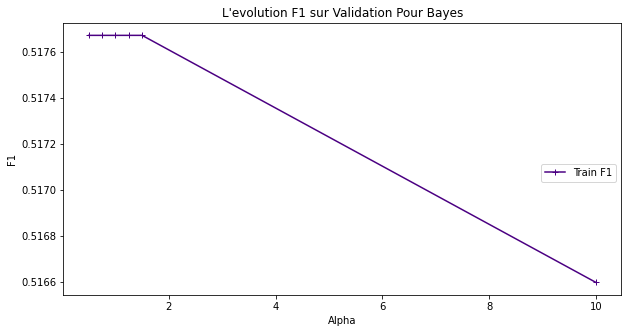

In [693]:
a = [0.5, 0.75, 1, 1.25, 1.5, 10]
bayes = bnb(a, f1_score, np.array(X_train), np.array(y_train), np.array(X_validation), np.array(y_validation))
print(bayes[0:2])
graph = plt.figure(figsize=(10,5))
graph = graph.add_subplot(1,1,1)
graph.plot(a, bayes[2], marker="+", c='indigo', label='Train F1')
graph.legend(bbox_to_anchor=(1, 0.5))
graph.set_title("L'evolution F1 sur Validation Pour Bayes")
graph.set_xlabel("Alpha"), graph.set_ylabel("F1")

Notre parametre $\alpha$ ideal est `0.5` avec un score `F1` de `52%`

## Modèle de régression logistique

Nous allons maintenant entrainer notre jeu de donnees par le modele `logistique` en utilisant la penalite `L2` ($\lambda$)

Nous allons poser $\lambda = \{0.001, 0.01, 0.1, 1, 10, 100\}$

(0.01, 0.6)


(Text(0.5, 0, 'Alpha'), Text(0, 0.5, 'F1'))

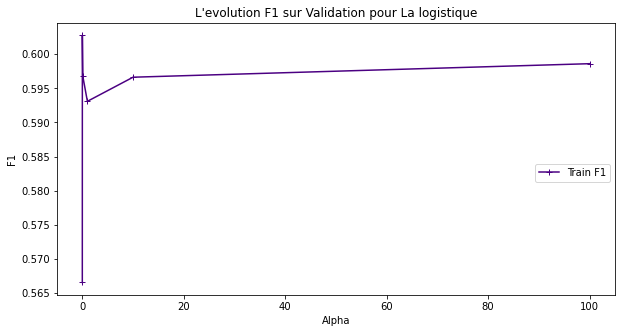

In [694]:
# def blg(c,metric,xtrain,ytrain,xtest,ytest):
#     best_model=0
#     best_error=0
#     m = []
#     for val in c :
#         model=LogisticRegression(C=val,max_iter=10000)
#         fitted_model=model.fit(xtrain,ytrain)
#         error=metric(fitted_model.predict(xtest),ytest)
#         m.append(error)
#         #print(error)
#         if error > best_error :
#             best_error = error
#             best_model= val
#             mod = model
#     #print(best_error)
#     return best_model, np.round(best_error, 2), m, model

# l = [0.001,0.01,0.1,1,10, 100]
bg = blg(l, f1_score, np.array(X_train), np.array(y_train), np.array(X_validation), np.array(y_validation))
print(bg[0:2])
graph = plt.figure(figsize=(10,5))
graph = graph.add_subplot(1,1,1)
graph.plot(l, bg[2], marker="+", c='indigo', label='Train F1')
graph.legend(bbox_to_anchor=(1, 0.5))
graph.set_title("L'evolution F1 sur Validation pour La logistique")
graph.set_xlabel("Alpha"), graph.set_ylabel("F1")

Notre parametre $\alpha$ ideal est $\lambda$=`0.1` avec un score `F1` de `60%`

## Modèle de Gradient Boosting

Soit les hyperparametres suivant:
 
* $\alpha$ : le taux d'apprentissage

* D : La profondeur maximal de l'arbre

* n : Le nombre d'étapes de boosting

On doit choisir les hyperparametre qui maximise le `F1` dans le jeu de validation.

Nous allons poser : 

* $\alpha = \{0.001, 0.01, 0.1, 1\}$ 

* D = {2, 3, 4, 5}

* n = {100,150,200,250,300}

In [695]:
# def bgb(l_rate,nest,mdept,metric,xtrain,ytrain,xtest,ytest):
#     best_model=0
#     best_error=0
#     for rate in l_rate :
#         for n in nest :
#             for dept in mdept :
#                 model=GradientBoostingClassifier(learning_rate=rate,n_estimators=n,max_depth=dept)
#                 fitted_model=model.fit(xtrain,ytrain)
#                 error=metric(fitted_model.predict(xtest),ytest)
#                 if error > best_error :
#                     best_error = error
#                     best_model=model
#                     taux = rate
#                     prof = dept
#                     nomb = n
#     return taux, prof, nomb, np.round(best_error, 2), best_model

# a = [0.001,0.01,0.1,1]
# D = [2, 3, 4, 5]
# n = [100,150,200,250,300]

# mod = bgb(a, n, D, f1_score, np.array(X_train), np.array(y_train), np.array(X_validation), np.array(y_validation))
# print(mod[0:4])
print(X_train.shape, X_validation.shape, X_test.shape)

(6160, 26) (1406, 26) (1407, 26)


Avec un score de `F1 = 61%` , notre meilleur modele est quand :

* $\alpha$ = 0.01

* D = 4

* n = 150

## Réseau de neurones

On va maintenant entrainer plusieurs réseaux de neurones afin de choisir la meilleur combinaison d'hyperparamètres. On va utiliser les hyperparamètres suivant pour entrainer le modèle :

$$
\lambda \in \{{0.01, 0.1, 1}\}
\\
\alpha \in \{{0.001, 0.01, 0.1}\}
\\
L = 3 
\\
U \in \{{200, 300, 700}\}
$$

 * $\lambda$ : régularisation
 * $\alpha$ : taux d'apprentissage
 * $L$ : nombre de hidden layer
 * $U$ : nombre de noeud dans chaque hidden layer

In [3]:
# C = [0.01, 0.1,  1]
# R = [0.0001, 0.001, 0.01]
# L = [300, 500, 700]

# liste = ["L2", "taux d'apprentissage", "hidden layer", "units"]
# parame = []
# result_train = []
# result_validation = []
# result_f1 = []

# for i in range(0, len(C)):
#     for j in range(0, len(R)):
#         for k in range(0, len(L)):
#             nn = MLPClassifier(random_state=1234, early_stopping=True, hidden_layer_sizes = (L[k], L[k], L[k], L[k]), alpha=C[i], learning_rate_init=R[j])
#             nn.fit(np.array(X_train), np.array(y_train))
#             result_train.append(np.round(accuracy_score(nn.predict(np.array(X_train)),np.array(y_train)), 2))
#             result_validation.append(np.round(accuracy_score(nn.predict(np.array(X_validation)),np.array(y_validation)), 2))
#             result_f1.append(np.round(f1_score(nn.predict(np.array(X_validation)),np.array(y_validation)), 2))                                                                                       
#             parame.append([C[i], R[j] , L[k]])
#             print(parame, result_train, result_validation, result_f1)
 
                           
# np.save('parame.npy', parame)
# np.save('result_train.npy', result_train) 
# np.save('result_validation.npy', result_validation)
# np.save('result_f1.npy', result_f1)  

parame = np.load('parame.npy')
result_train = np.load('result_train.npy')
result_validation = np.load('result_validation.npy')
result_f1 = np.load('result_f1.npy')

result_f1 = result_f1.tolist()
parame = parame.tolist()
result_train = result_train.tolist()
result_validation = result_validation.tolist()

Apres avoir rouler notre modele de reseaux de neurones, nous allons choisir les parametres $\theta =\{\lambda, \alpha, L\}$ en maximisant la mesure `F1` obtenur sur le jeu de `validation`. Nous allons effectuer des comparaison entre cette mesure et la mesure `accuracy`.

$$
accuracy  = \frac{1}{n} \sum_i^n \mathbb{1}_{\{y_i = \hat{y_i}\}}
$$

$$
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

$$
precision = \frac{\sum_i^n \mathbb{1}_{\{y_i=\hat{y_i}=1\}}}{\sum_i^n \mathbb{1}_{\{\hat{y_i}=1\}}}
$$


$$
Recall = \frac{\sum_i^n \mathbb{1}_{\{y_i=\hat{y_i}=1\}}}{\sum_i^n \mathbb{1}_{\{y_i=1\}}}
$$

 * Un modele avec un score `F1` eleve signifie que la `precision` et le `Recall` sont eleves
 
 * Un modele avec un score `F1` moyen signifie que la `precision` est faible et le `Recall` eleve ou le contraire
 
 * Un modele avec un score `F1` faible signifie que la `precision` et le `Recall` sont faibles
 


In [4]:
result = pd.DataFrame(parame)
result["Accuracy Train"] = result_train
result["Accuracy Validation"] = result_validation
result["result_f1"] = result_f1
result.rename(columns = {0:'L2', 1:"taux d'apprentissage", 2:"hidden layer"}, inplace = True)
result.head()

,L2,taux d'apprentissage,hidden layer,Accuracy Train,Accuracy Validation,result_f1
0,0.01,0.0001,300.0,0.78,0.70,0.56
1,0.01,0.0001,500.0,0.76,0.75,0.57
2,0.01,0.0001,700.0,0.75,0.69,0.55
3,0.01,0.0010,300.0,0.83,0.76,0.56
4,0.01,0.0010,500.0,0.81,0.75,0.57


Après avoir rouler 27 modèles différents ($3\times 3 \times 3$ = 27 combinaisons possibles), on est interesser de voir le comportement de la mesure `accuracy` sur le jeu d'entrainement et le jeu de validation et la mesure `F1` pour les 27 itereations .

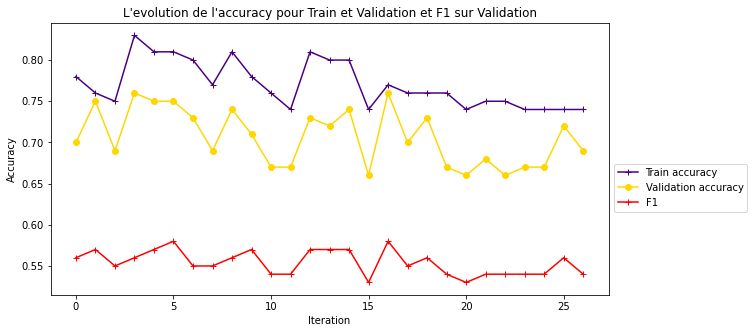

In [6]:
graph = plt.figure(figsize=(10,5))
graph = graph.add_subplot(1,1,1)
graph.plot(range(27), result_train, marker="+", c='indigo', label='Train accuracy')
graph.plot(range(27), result_validation, marker="o", c = 'gold', label='Validation accuracy')
graph.plot(range(27), result_f1, marker="+", c='red', label='F1')
graph.legend(bbox_to_anchor=(1, 0.5))
graph.set_title("L'evolution de l'accuracy pour Train et Validation et F1 sur Validation")
graph.set_xlabel("Iteration"), graph.set_ylabel("Accuracy")
parame[result_f1.index(max(result_f1))]
plt.savefig("evolSmote.png")

On remarque que les valeur de `F1` sur le jeu d'entrainement varient entre `53%` et `58%`. En ce qui concerene les valeurs de `accuracy`, elles varient  autour de `66%` et `76%`. Les mesures se comporte de la meme maniere pour le jeu de donneees equilibrer. Les parametres qui maximise `F1` sont :

 * $\lambda$ = 0.01
 * $\alpha$ = 0.001
 * $L$ = 700


Nous allons effectue le meme exercice qu'avant, mous allons entrainer notre jeu de donnees avec les memes parametres, mais cette fois-ci sur le jeu de donnees original, c'est-a-dire sans le sur-échantillonnage que nous avont effectue pour equilibrer la variable reponse `Churn`.

In [7]:
# X_ = jeu_temp.drop(['Churn'], axis=1)
# y_ = jeu_temp["Churn"]

# Xtrain, Xautre, ytrain, yautre = train_test_split(X_, y_, test_size=0.3, random_state=1234)
# Xvalidation, Xtest, yvalidation, ytest = train_test_split(Xautre, yautre, test_size=(1/3), random_state=1234)

# C = [0.01, 0.1,  1]
# R = [0.0001, 0.001, 0.01]
# L = [200, 500, 1000]
# N = [2000, 3000]

# liste = ["L2", "taux d'apprentissage", "hidden layer", "units"]
# parame_ = []
# result_train_ = []
# result_validation_ = []
# result_f1_ = []

# for i in range(0, len(C)):
#     for j in range(0, len(R)):
#         for k in range(0, len(L)):
#             nn = MLPClassifier(random_state=1234, early_stopping=True, hidden_layer_sizes = (L[k], L[k], L[k]), alpha=C[i], learning_rate_init=R[j])
#             nn.fit(np.array(Xtrain), np.array(ytrain))
#             result_train_.append(np.round(accuracy_score(nn.predict(np.array(Xtrain)),np.array(ytrain)), 2))
#             result_validation_.append(np.round(accuracy_score(nn.predict(np.array(Xvalidation)),np.array(yvalidation)), 2))
#             result_f1_.append(np.round(f1_score(nn.predict(np.array(Xvalidation)),np.array(yvalidation)), 2))                                                                                       
#             parame_.append([C[i], R[j] , L[k]])
#             print(parame_, result_train_, result_validation_, result_f1_)
 
                           
# np.save('parame_.npy', parame_)
# np.save('result_train_.npy', result_train_) 
# np.save('result_validation_.npy', result_validation_)
# np.save('result_f1_.npy', result_f1_)

parame_ = np.load('parame_.npy')
result_train_ = np.load('result_train_.npy')
result_validation_ = np.load('result_validation_.npy')
result_f1_ = np.load('result_f1_.npy')

result_f1_ = result_f1_.tolist()
parame_ = parame_.tolist()
result_train_ = result_train_.tolist()
result_validation_ = result_validation_.tolist()

In [8]:
result = pd.DataFrame(parame_)
result["Accuracy Train"] = result_train_
result["Accuracy Validation"] = result_validation_
result["result_f1"] = result_f1_
result.rename(columns = {0:'L2', 1:"taux d'apprentissage", 2:"hidden layer"}, inplace = True)
result.head()

,L2,taux d'apprentissage,hidden layer,Accuracy Train,Accuracy Validation,result_f1
0,0.01,0.0001,200.0,0.78,0.79,0.42
1,0.01,0.0001,500.0,0.79,0.80,0.46
2,0.01,0.0001,1000.0,0.76,0.78,0.24
3,0.01,0.0010,200.0,0.77,0.78,0.48
4,0.01,0.0010,500.0,0.80,0.81,0.54


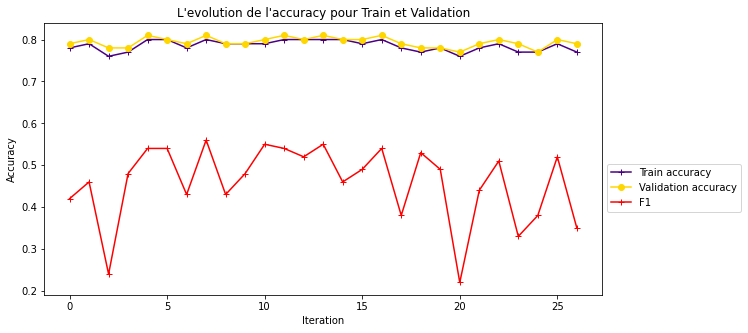

In [9]:
graph = plt.figure(figsize=(10,5))
graph = graph.add_subplot(1,1,1)
graph.plot(range(27), result_train_, marker="+", c='indigo', label='Train accuracy')
graph.plot(range(27), result_validation_, marker="o", c = 'gold', label='Validation accuracy')
graph.plot(range(27), result_f1_, marker="+", c='red', label='F1')
graph.legend(bbox_to_anchor=(1, 0.5))
graph.set_title("L'evolution de l'accuracy pour Train et Validation")
graph.set_xlabel("Iteration"), graph.set_ylabel("Accuracy")
plt.savefig("evolSans.png")
#parame_[result_f1_.index(np.max(result_f1_))]
#np.max(result_f1_)
#np.min(result_validation_)

On remarque que la valeur de `accuracy` sur le jeu de validation ne varie pas beaucoup, elle est autour de `77%` et `81%`. Cette fois-ci, on remarque que le score de `F1` est trop faible comprativement a l'autre analyse que nous avons fait pour le jeu de donnees avec la variable `Churn` equilibrer, le maximum du score est `56%`. A notre avis, cela est du au fait que nous avons que `26.5%` de personne qui ont decider d'annuler leur abonement dans notre jeu donnees, ce qui n'est pas assez. Les parametres qui maximise le score `F1` sont :

 * $\lambda$ = 0.01
 * $\alpha$ = 0.01
 * $L$ = 500
 
## RNN

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
X_train.shape

(3714, 26)

In [45]:
model = keras.Sequential()
model.add(layers.SimpleRNN(3, activation = 'tanh', use_bias = True))
model.add(layers.Dense(1))
model.compile(loss="binary_crossentropy", optimizer = 'adam')
h = model.fit(np.arX_train, y_train, epochs=1000)

2022-12-05 20:20:10.292023: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/1000


ValueError: in user code:

    /Users/mustapha/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/mustapha/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/mustapha/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/mustapha/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/mustapha/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/mustapha/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/mustapha/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /Users/mustapha/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/mustapha/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:219 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_21 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 26)
